# Face Recognition Yale Dataset

In [1]:
from PIL import Image
import numpy as np
import glob
from sklearn.preprocessing import normalize
filelist= list()
org_dataset = []
elem = ['+00', '+20', '+45', '+90', '-20', '-35']
for i in range(1, 24):
    if i != 14:
        for k in elem:
            filelist.append('./CroppedYale/yaleB'+str(i).zfill(2)+'/yaleB'+str(i).zfill(2)+'_P00A'+'+000E'+k+'.pgm')

print(len(filelist)/6)

for fname in filelist:
            img = np.array(Image.open(fname))
            img = img.reshape(img.shape[0]*img.shape[1])
            org_dataset.append(img)

org_dataset = np.array(org_dataset)
num_components = len(org_dataset)
org_dataset

22.0


array([[80, 80, 84, ..., 12, 12, 11],
       [94, 94, 96, ...,  6,  7,  8],
       [59, 66, 77, ...,  5,  7,  7],
       ...,
       [ 9,  9, 10, ..., 15, 15, 15],
       [53, 54, 54, ..., 82, 80, 76],
       [43, 44, 47, ..., 69, 68, 66]], dtype=uint8)

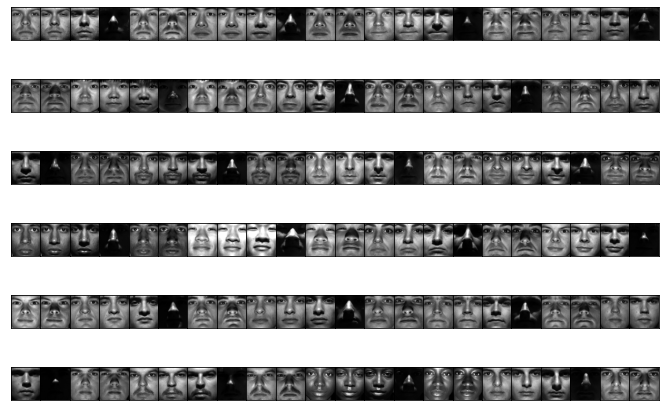

<Figure size 432x288 with 0 Axes>

In [2]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

gs = gridspec.GridSpec(6, 22, top=1.5, bottom=0., right=1.5, left=0., hspace=0., wspace=0.)

i = 0
for g in gs:
    ax = plt.subplot(g)
    ax.imshow(org_dataset[i].reshape(192, 168), cmap = plt.get_cmap("gray"))
    ax.set_xticks([])
    ax.set_yticks([])
    i += 1
plt.savefig('faces', bbox_inches='tight')
plt.show()
plt.clf()

In [3]:
mean_vector = np.mean(org_dataset, axis=0)
dataset = org_dataset - mean_vector

In [4]:
from numpy import linalg as la
cov_mat = np.dot(dataset, dataset.T)
eig_values, eigen_vectors = la.eig(cov_mat)
eig_vectors = np.dot(dataset.T, eigen_vectors)
for i in range(eig_vectors.shape[1]):
	eig_vectors[:, i] = eig_vectors[:, i]/la.norm(eig_vectors[:, i])
eig_values = eig_values.astype(float)
eig_vectors = eig_vectors.astype(float)

In [5]:
k_eig_val = eig_values.argsort()[-num_components:][::-1]
eigen_faces = []

for i in k_eig_val:
	eigen_faces.append(eig_vectors[:, i])

eigen_faces = np.array(eigen_faces)
eigen_faces

array([[-0.00311739, -0.00313611, -0.00322746, ..., -0.00151901,
        -0.00141521, -0.00131261],
       [ 0.00269279,  0.0030214 ,  0.00320746, ..., -0.00409296,
        -0.00398564, -0.00396996],
       [-0.00261598, -0.00305325, -0.00351407, ...,  0.00227506,
         0.00266257,  0.00305207],
       ...,
       [-0.00291173, -0.00087662, -0.00085775, ...,  0.0035562 ,
         0.00426909,  0.00657603],
       [-0.00196555, -0.00162573, -0.00255938, ..., -0.00234635,
        -0.00452381, -0.00712684],
       [ 0.0026339 ,  0.00065702,  0.00043503, ..., -0.00870741,
        -0.00851666, -0.01059641]])

In [6]:
org_dim_eig_faces = []

for i in range(eigen_faces.shape[0]):
	org_dim_eig_faces.append(eigen_faces[i].reshape(192, 168))

org_dim_eig_faces = np.array(org_dim_eig_faces)

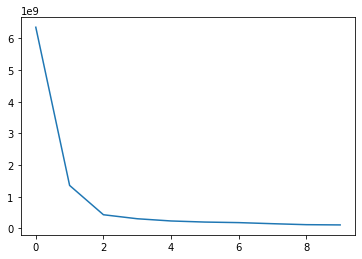

<Figure size 432x288 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(eig_values[:10])
plt.show()
plt.clf()

In [8]:
from numpy import trapz

total_energy = trapz(eig_values, dx=1)
print("Total Energy:", total_energy)

q = 0.8
k = 0
while True:
	k_energy = trapz(eig_values[:k], dx=1)
	print("Energy captured by", k, "components:", k_energy)
	if k_energy >= q*total_energy:
		break
	k += 1

print("Number of components to capture "+ str(q*100)+"% energy:", k)

Total Energy: 7759647872.6759815
Energy captured by 0 components: 0.0
Energy captured by 1 components: 0.0
Energy captured by 2 components: 3854728074.5532327
Energy captured by 3 components: 4748898189.314117
Energy captured by 4 components: 5116898183.952259
Energy captured by 5 components: 5386533813.006676
Energy captured by 6 components: 5603854055.376294
Energy captured by 7 components: 5795246167.936755
Energy captured by 8 components: 5960753655.508005
Energy captured by 9 components: 6093691535.158627
Energy captured by 10 components: 6207431287.8968
Energy captured by 11 components: 6310725887.077902
Number of components to capture 80.0% energy: 11


In [11]:
reduced_data = np.array(eigen_faces[:11]).transpose()

In [12]:
w = np.array([np.dot(reduced_data.transpose(),i) for i in dataset])

In [13]:
w

array([[-5363.52463856,  -300.2726685 ,  -782.32978145, ...,
          360.1428791 ,  -759.25784745,  -824.46949938],
       [-5899.79089401,  2776.68286204,  -660.59049389, ...,
          180.31850749,  -583.16513456,  -324.25487033],
       [-4256.01421717,  6290.40562217,  -395.68931603, ...,
           48.48904232,  -228.49186831,   444.6895512 ],
       ...,
       [13456.46243705,  -491.78206046,   596.93962529, ...,
          548.05489093,   420.4223704 ,    38.91225223],
       [-5270.64649689, -1588.17721125, -1809.72668512, ...,
         1469.29386225,   217.13866127,  -610.63595122],
       [-1572.05098546, -3728.08983064, -2031.28246424, ...,
         1164.33880312,   572.4856267 ,  -590.31254099]])

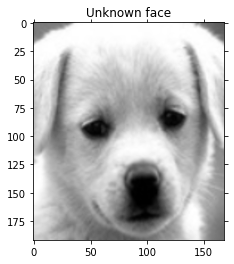

In [14]:
unknown_face = plt.imread('./rsz_dog_2.pgm') # './CroppedYale/yaleB29/yaleB29_P00A-015E+20.pgm'
unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()

plt.imshow(unknown_face, cmap='gray')
plt.title('Unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

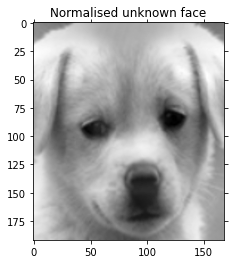

In [15]:
normalised_uface_vector = unknown_face_vector-mean_vector

plt.imshow(normalised_uface_vector.reshape(192, 168), cmap='gray')
plt.title('Normalised unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [16]:
w_unknown = np.dot(reduced_data.transpose(), normalised_uface_vector)
w_unknown

array([-14909.98688914,  -3537.78189182,    295.63934871,  -4502.76774166,
        -3514.36379697,  -2242.95642466,   1005.5282432 ,  -4245.47887564,
         1616.87094957,   -645.59356487,  -1581.75511747])

In [17]:
diff  = w - w_unknown
norms = np.linalg.norm(diff, axis=1)
min(norms)

7379.898499685347

In [18]:
from PIL import Image
import numpy as np

filelist= list()
validation_dataset = []

for i in range(12, 24):
    if i != 14:
        filelist.append('./CroppedYale/yaleB'+str(i).zfill(2)+'/yaleB'+str(i).zfill(2)+'_P00A'+'+005E'+'+10'+'.pgm')

print(len(filelist))

for i in range(32, 40):
    if i != 14:
        filelist.append('./CroppedYale/yaleB'+str(i).zfill(2)+'/yaleB'+str(i).zfill(2)+'_P00A'+'+005E'+'+10'+'.pgm')
print(len(filelist))

for fname in filelist:
            img = np.array(Image.open(fname))
            img = img.reshape(img.shape[0]*img.shape[1])
            validation_dataset.append(img)

validation_dataset = np.array(validation_dataset)
num_components = len(validation_dataset)
validation_dataset

11
19


array([[ 42,  45,  45, ...,   7,   7,   7],
       [ 99, 100, 101, ...,  67,  62,  56],
       [105, 108, 108, ...,  49,  44,  36],
       ...,
       [ 86,  90,  92, ...,   0,   0,   0],
       [ 43,  45,  51, ...,  13,  14,  16],
       [ 93,  96, 100, ...,   2,   2,   4]], dtype=uint8)

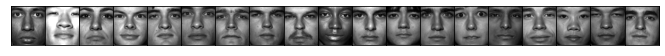

<Figure size 432x288 with 0 Axes>

In [33]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

gs = gridspec.GridSpec(1, 19, top=1.0, bottom=0., right=1.5, left=0., hspace=0., wspace=0.)

i = 0
for g in gs:
    if(i==19):
        ax.imshow(validation_dataset[18].reshape(192, 168), cmap = plt.get_cmap("gray"))
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        ax = plt.subplot(g)
        ax.imshow(validation_dataset[i].reshape(192, 168), cmap = plt.get_cmap("gray"))
        ax.set_xticks([])
        ax.set_yticks([])
        i += 1

plt.savefig('faces_val', bbox_inches='tight')
plt.show()
plt.clf()

In [20]:
valid = validation_dataset-mean_vector

In [21]:
np.random.seed(1234)

count   = 0
wrong_neg = 0
true_neg = 0
wrong_pos = 0
true_pos = 0
params = list()
num_images   = 0
correct_pred = 0

def recogniser(img, proj_data, w, limit, error):
    global count, correct_pred, wrong_neg, true_neg, wrong_pos, true_pos

    unknown_face_vector = np.array(img, dtype='float64').flatten()

    count+=1

    w_unknown = np.dot(proj_data.transpose(), unknown_face_vector)

    diff  = w - w_unknown

    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)
    params = np.min(norms)
    if(count <= 12):
            if((count+10) == (index//6)):
                if(params <= limit):
                    correct_pred+=1
                    true_neg+=1
                else:
                    wrong_pos +=1
            else:
                wrong_pos +=1
    if(count > 12):
        if(params > limit):
            correct_pred+=1
            true_pos+=1
        else:
            wrong_neg +=1


number = list()
predictions = list()
predictions_f1 = list()
for j in range (1500, 3900, 10):
    for i in valid:
        recogniser(i, reduced_data, w, j, error=0.00)
    predictions.append(correct_pred/count*100.00)
    acc = correct_pred/count
    pre = true_pos/(wrong_neg+true_pos)
    rec = true_pos/(wrong_pos+true_pos)
    predictions_f1.append(2*pre*rec/(pre+rec)*100.00)
    count   = 0
    correct_pred = 0
    wrong_neg = 0
    true_neg = 0
    wrong_pos = 0
    true_pos = 0
    number.append(j)
    print(j)

1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
2220
2230
2240
2250
2260
2270
2280
2290
2300
2310
2320
2330
2340
2350
2360
2370
2380
2390
2400
2410
2420
2430
2440
2450
2460
2470
2480
2490
2500
2510
2520
2530
2540
2550
2560
2570
2580
2590
2600
2610
2620
2630
2640
2650
2660
2670
2680
2690
2700
2710
2720
2730
2740
2750
2760
2770
2780
2790
2800
2810
2820
2830
2840
2850
2860
2870
2880
2890
2900
2910
2920
2930
2940
2950
2960
2970
2980
2990
3000
3010
3020
3030
3040
3050
3060
3070
3080
3090
3100
3110
3120
3130
3140
3150
3160
3170
3180
3190
3200
3210
3220
3230
3240
3250
3260
3270
3280
3290
3300
3310
3320
3330
3340
3350
3360
3370
3380
3390
3400
3410
3420
3430
3440
3450
3460
3470
3480
3490


In [22]:
number[np.argmax(predictions)]

2090

In [23]:
max(predictions)

84.21052631578947

In [24]:
bound = number[np.argmax(predictions_f1)]
bound

2090

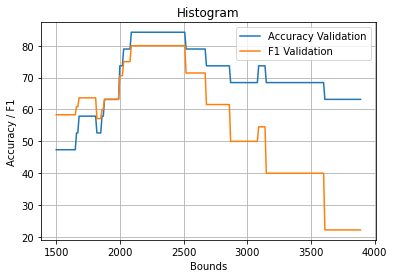

In [25]:
import matplotlib.pyplot as plt

plt.plot(number, predictions, label='Accuracy Validation')
plt.plot(number, predictions_f1, label='F1 Validation')
plt.legend()

plt.xlabel('Bounds')
plt.ylabel('Accuracy / F1')
plt.title('Histogram')
plt.grid(True)
plt.show()

In [26]:
from PIL import Image
import numpy as np

filelist= list()
test_dataset = []

for i in range(1, 12):
    if i != 14:
        filelist.append('./CroppedYale/yaleB'+str(i).zfill(2)+'/yaleB'+str(i).zfill(2)+'_P00A'+'+005E'+'+10'+'.pgm')
print(len(filelist))
for i in range(24, 32):
    if i != 14:
        filelist.append('./CroppedYale/yaleB'+str(i).zfill(2)+'/yaleB'+str(i).zfill(2)+'_P00A'+'+005E'+'+10'+'.pgm')
print(len(filelist))

for fname in filelist:
            img = np.array(Image.open(fname))
            img = img.reshape(img.shape[0]*img.shape[1])
            test_dataset.append(img)

test_dataset = np.array(test_dataset)
num_components = len(test_dataset)
test_dataset

11
19


array([[106, 107, 116, ...,   8,   9,   9],
       [102, 106, 109, ...,  72,  70,  68],
       [118, 124, 129, ...,  15,  15,  18],
       ...,
       [116, 123, 129, ...,  88,  86,  99],
       [ 84,  90,  97, ...,  10,  11,  11],
       [ 67,  69,  71, ...,  15,  15,  16]], dtype=uint8)

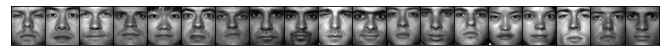

<Figure size 432x288 with 0 Axes>

In [32]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

gs = gridspec.GridSpec(1, 19, top=1.0, bottom=0., right=1.5, left=0., hspace=0., wspace=0.)

i = 0
for g in gs:
    if(i==19):
        ax.imshow(test_dataset[18].reshape(192, 168), cmap = plt.get_cmap("gray"))
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        ax = plt.subplot(g)
        ax.imshow(test_dataset[i].reshape(192, 168), cmap = plt.get_cmap("gray"))
        ax.set_xticks([])
        ax.set_yticks([])
        i += 1

plt.savefig('faces_test', bbox_inches='tight')
plt.show()
plt.clf()

In [28]:
test = test_dataset-mean_vector

In [31]:
np.random.seed(1234)
count   = 0
wrong_neg = 0
true_neg = 0
wrong_pos = 0
true_pos = 0
params = list()
num_images   = 0
correct_pred = 0


def recogniser(img, proj_data, w, limit, error):
    global count, correct_pred, wrong_neg, true_neg, wrong_pos, true_pos

    unknown_face_vector = np.array(img, dtype='float64').flatten()

    count+=1

    w_unknown = np.dot(proj_data.transpose(), unknown_face_vector)

    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)

    if error:
        value = np.random.normal(0, error/3, norms.shape[0])
        while max(value) > error or min(value) < -error:
            value = np.random.normal(0, error/3, norms.shape[0])
        norms = norms + value*norms

    index = np.argmin(norms)
    params = np.min(norms)

    if(count <= 9):
        if(count == index//6+1):
            if(params <= limit):
                correct_pred+=1
                true_neg+=1
            else:
                    wrong_pos +=1
        else:
            wrong_pos +=1
    if(count > 9):
        if(params > limit):
            correct_pred+=1
            true_pos+=1
        else:
            wrong_neg +=1

for i in test:
    recogniser(i, reduced_data, w, 2090, error=0.25)

acc = correct_pred/count
pre = true_pos/(wrong_neg+true_pos)
rec = true_pos/(wrong_pos+true_pos)
f1 = 2*pre*rec/(pre+rec)

print('Accuracy: {}/{} = {}%'.format(correct_pred, count, acc*100.00))
print('Precision: {}/{} = {}%'.format(true_pos, (wrong_neg+true_pos), pre*100.00))
print('Recall: {}/{} = {}%'.format(true_pos, (wrong_pos+true_pos), rec*100.00))
print('F1 score: {}%'.format(f1*100.00))

Accuracy: 16/19 = 84.21052631578947%
Precision: 8/10 = 80.0%
Recall: 8/9 = 88.88888888888889%
F1 score: 84.21052631578948%


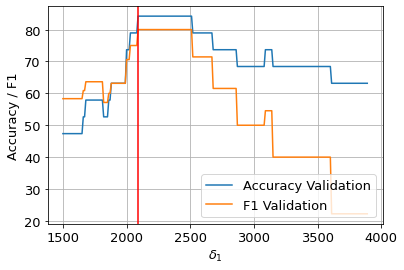

In [30]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 13})
plt.plot(number, predictions, label='Accuracy Validation')
plt.plot(number, predictions_f1, label='F1 Validation')
plt.legend(loc='lower right')


plt.axvline(x=2090, color ='red')
plt.xlabel('$\delta_1$')
plt.ylabel('Accuracy / F1')
plt.grid(True)
plt.savefig('graph.pdf', bbox_inches='tight')
plt.show()